# Simulación 7
García. Los clientes llegan a un banco según un proceso de Poisson con media de 180 por hora. Seis cajeros atienden a los clientes, quienes tienen la opción de realizar una de cuatro diferentes transacciones.

La probabilidad de realizar cada una de las transacciones y su tiempo medio de servicio se muestran en la siguiente tabla; en cada categoría el tiempo de servicio está distribuido exponencialmente y no se puede realizar más de un tipo de transacción por servicio.

Se ofrecen dos alternativas para hacer colas:
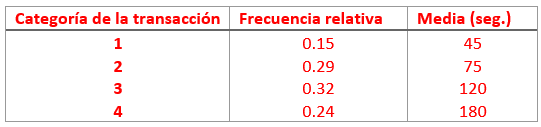

a) Los clientes forman una sola cola y cuando un cajero está disponible, la persona al frente de la cola pasa a ser atendido.

b) Colas separadas para cada cajero. Si un cajero está libre cuando un cliente llega, el cliente recibe servicio con ese cajero. De otra manera, el cliente va la cola que tenga menos gente. Después de esto, el cliente espera según un proceso PEPS hasta que pueda realizar su transacción y después sale del banco.

Construya un modelo de simulación y corra el modelo por 8 horas; compare los resultados de las dos alternativas de hacer fila. ¿Cuál de las dos alternativas reduce el tiempo de espera y por qué?

Librerías

In [ ]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

Parámetros de las simulaciones

In [ ]:
hours_simulation = 8 # Total time of simulation
simulation_time_seconds = hours_simulation*60*60

clients_per_hour = 180
mean_interarrival_seconds = 60*60/clients_per_hour

bank_tellers = 6 # Número de cajeros atendiendo en el banco

# Escenario A

In [ ]:
hours_simulation = 8 # Total time of simulation
seconds_simulation = hours_simulation*60*60

clients_per_hour = 180
mean_interarrival_seconds = 60*60/clients_per_hour

In [ ]:
def expon(mean):
        return (-mean * np.log(np.random.uniform(0,1)))

class Client:
    def __init__(self,env,selected_teller,name,transaction_type):

        self.env = env
        self.selected_teller = selected_teller
        self.name = name
        self.transaction_type = transaction_type


    def in_turn(self):
        transaction_time = 0

        if self.transaction_type == 1:
            transaction_time = expon(45)
        elif self.transaction_type == 2:
            transaction_time = expon(75)
        elif self.transaction_type == 3:
            transaction_time = expon(120)
        else:  # transaction_type == 4:
            transaction_time = expon(180)
        
        yield self.env.timeout(transaction_time)


    def action(self):

        self.arrival_time = env.now # Almacenar tiempo de llegada para luego calcular delay

        with self.selected_teller.request() as req:
            yield req
            client_delay_in_q = env.now-self.arrival_time

            print(client_delay_in_q) # Devolver estadística de interés en pantalla

            yield from self.in_turn() # Transcurre el tiempo de servicio del turnpo


def client_generator(env,selected_teller):
    # Contador para nombrar clientes según orden de llegada: cliente 1, cliente 2,... cliente i
    i = 1
    while True:
        # Establecer tiempo que le tomará al cliente llegar al banco y el tipo de su transacción,
        # en base a las distribuciones de probabilidad dadas
        interarrival_time = expon(mean_interarrival_seconds)
        transaction_type = np.random.choice([1, 2, 3, 4], p=[0.15, 0.29, 0.32, 0.24])

        # Esperar que el cliente llegue al banco
        yield env.timeout(interarrival_time)

        # Crear cliente e iniciar su proceso
        client = Client(env,selected_teller,name=f"Cliente {i}",transaction_type=transaction_type)
        env.process(client.action())
        i+=1


np.random.seed(0)

env = simpy.Environment()
tellers_list = []
num_tellers = 6

selected_teller = simpy.Resource(env,num_tellers) # Solo hay una fila, con servidor de capacidad "num_tellers"

env.process(client_generator(env,selected_teller))
env.run(until=seconds_simulation)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9591275620173576
30.609152483248153
26.199605222778786
65.76654080909299
105.15513367196047
118.31578338671204
95.87138440315852
97.21362449081028
95.21578430170706
80.5730967837514
43.81114519335017
18.675058518546507
15.507414129163067
3.370329520751625
16.11694382112546
24.63729446851829
28.38669811477871
27.876539261203902
33.86009613047622
48.08909797111812
19.999569833804458
45.68038221127415
73.05069938515328
57.6969483812278
37.68745261338074
38.731388104497796
15.21007599397376
86.78264146690788
95.3712313571491
93.7943005025353
32.39525262482971
11.638757794576122
2.4459049261896553
14.3930003927494
38.06060626119256
26.68161867115259
20.838618741929054
54.73970116913188
55.00482467298423
64.46412416688713
70.28800026111628
76.65333175835872
82.38764081186173
94.00051559961798
119.12573848140528
84.13679923707195
84.6194779447327
109.69044122533387
53.76934839510477
73.7713760919089
70.13423465257756
93.84754101395811
88.8

# Escenario A, tratando de exportar resultados

In [ ]:
def expon(mean):
        return (-mean * np.log(np.random.uniform(0,1)))

class Client:
    def __init__(self,env,selected_teller,name,transaction_type):

        self.env = env
        self.selected_teller = selected_teller
        self.name = name
        self.transaction_type = transaction_type


    def in_turn(self):
        transaction_time = 0

        if self.transaction_type == 1:
            transaction_time = expon(45)
        elif self.transaction_type == 2:
            transaction_time = expon(75)
        elif self.transaction_type == 3:
            transaction_time = expon(120)
        else:  # transaction_type == 4:
            transaction_time = expon(180)
        
        yield self.env.timeout(transaction_time)


    def action(self):

        self.arrival_time = env.now # Almacenar tiempo de llegada para luego calcular delay

        with self.selected_teller.request() as req:
            yield req
            client_delay_in_q = env.now-self.arrival_time
            resultados.append(client_delay_in_q)
            print(client_delay_in_q) # Devolver estadística de interés en pantalla

            yield from self.in_turn() # Transcurre el tiempo de servicio del turnpo


def client_generator(env,selected_teller):
    # Contador para nombrar clientes según orden de llegada: cliente 1, cliente 2,... cliente i
    i = 1
    while True:
        # Establecer tiempo que le tomará al cliente llegar al banco y el tipo de su transacción,
        # en base a las distribuciones de probabilidad dadas
        interarrival_time = expon(mean_interarrival_seconds)
        transaction_type = np.random.choice([1, 2, 3, 4], p=[0.15, 0.29, 0.32, 0.24])

        # Esperar que el cliente llegue al banco
        yield env.timeout(interarrival_time)

        # Crear cliente e iniciar su proceso
        client = Client(env,selected_teller,name=f"Cliente {i}",transaction_type=transaction_type)
        env.process(client.action())
        i+=1

# CORRER LA SIMULACIÓN. tIEMPOS DE ESPERA SE ALMACENAN EN LISTA "RESULTADOS"
np.random.seed(0)

env = simpy.Environment()
tellers_list = []
num_tellers = 6

selected_teller = simpy.Resource(env,num_tellers) # Solo hay una fila, con servidor de capacidad "num_tellers"
resultados = []
env.process(client_generator(env,selected_teller))
env.run(until=seconds_simulation)

print(resultados)

# Escenario B

In [ ]:
hours_simulation = 8 # Total time of simulation
seconds_simulation = hours_simulation*60*60

clients_per_hour = 180
mean_interarrival_seconds = 60*60/clients_per_hour

In [ ]:
def expon(mean):
        return (-mean * np.log(np.random.uniform(0,1)))

class Client:
    def __init__(self,env,selected_teller,name,transaction_type):

        self.env = env
        self.selected_teller = selected_teller
        self.name = name
        self.transaction_type = transaction_type


    def in_turn(self):
        transaction_time = 0

        if self.transaction_type == 1:
            transaction_time = expon(45)
        elif self.transaction_type == 2:
            transaction_time = expon(75)
        elif self.transaction_type == 3:
            transaction_time = expon(120)
        else:  # transaction_type == 4:
            transaction_time = expon(180)
        
        yield self.env.timeout(transaction_time)


    def action(self):

        self.arrival_time = env.now # Almacenar tiempo de llegada para luego calcular delay

        with self.selected_teller.request() as req:
            yield req
            client_delay_in_q = env.now-self.arrival_time
            resultados.append(client_delay_in_q)
            print(client_delay_in_q) # Devolver estadística de interés en pantalla

            yield from self.in_turn() # Transcurre el tiempo de servicio del turnpo


def client_generator(env,tellers_list):
    # Contador para nombrar clientes según orden de llegada: cliente 1, cliente 2,... cliente i
    i = 1
    while True:
        # Establecer tiempo que le tomará al cliente llegar al banco y el tipo de su transacción,
        # en base a las distribuciones de probabilidad dadas
        interarrival_time = expon(mean_interarrival_seconds)
        transaction_type = np.random.choice([1, 2, 3, 4], p=[0.15, 0.29, 0.32, 0.24])

        # Esperar que el cliente llegue al banco
        yield env.timeout(interarrival_time)

        # ----- Elegir cajero donde hacer fila -----
        filas=[]
        for teller in tellers_list:
            filas.append(len(teller.queue)) 
        
        shortest_queue_index= 0
        shortest_queue_length =filas[0] 
        
        for i in range (0,len(filas)):
            if filas[i]<shortest_queue_length:
                shortest_queue_index=i
                shortest_queue_length=filas[i]

        selected_teller = tellers_list[shortest_queue_index]
        # -------------------------------------------

        # Crear cliente e iniciar su proceso
        client = Client(env,selected_teller,name=f"Cliente {i}",transaction_type=transaction_type)
        env.process(client.action())
        i+=1


# CORRER SIMULACIÓN. TIEMPOS DE ESPERA SE ALMACENAN EN LISTA "RESULTADOS"
np.random.seed(0)

env = simpy.Environment()
tellers_list = []
num_tellers = 6
for i in range (0,num_tellers):
    tellers_list.append(simpy.Resource(env,1))
    
resultados = []
env.process(client_generator(env,tellers_list))
env.run(until=seconds_simulation)

print(resultados)

0.0
0.0
0.0
0.0
0.0
69.60173898716187
2.6026024993518746
92.93574553405891
4.381606044735932
0.0
47.479070892731244
141.3350308945584
306.0370120558764
230.72072324551914
180.97661163096896
69.20151264578851
306.9211404374485
329.72849330758623
241.73677175089523
345.43788761615036
335.20717920236257
279.52340310468253
268.6857733377298
215.79469828840104
113.80199114819379
435.8100173995587
260.013423523775
70.6325818429774
344.6670398657546
282.19237874781896
110.62183852584405
404.5650606056362
166.91997635627695
230.93881201196086
363.54358233145365
448.978200021003
319.7602219613034
196.4984964345765
189.7119309314853
301.5608424034481
225.1667489756578
119.86823144093296
389.4641962109828
323.34556090463934
531.4614132322329
277.98544518659673
504.61044412248066
170.40343493128785
509.298632548011
565.4189456127368
397.7747790548078
422.78720282038887
221.2555756290119
540.8299636091434
514.5868323792473
456.2949280011642
263.3251045707856
471.77294527250024
264.8303763845861
595